# Jake Test Set

In [15]:
# imports
from importlib import reload
import os
import numpy as np

import seaborn as sns
from remote_sensing.plotting import globe as plt_globe

import pandas

# Load up

In [4]:
jake_tbl_file = os.path.join(os.getenv('DBOF_PATH'), 'DBOF_dev', 'Training', 
                             'Jake_test_set_meta.parquet')
jake_tbl = pandas.read_parquet(jake_tbl_file)
jake_tbl.head()

,lat,lon,row,col,datetime,UID,SSTK,SSSs,Divb2,SSS,SSH,U,Fs,V,Divb2_p90,pp_type
0,56.642715,-178.489578,11455,10504,2011-09-30,13173401466431510,True,True,True,True,True,True,True,True,-14.249792,1
1,56.642715,-57.489582,11455,16312,2011-09-30,1317340146643122510,True,True,True,True,True,True,True,True,-12.897206,1
2,56.642715,-56.489582,11455,16360,2011-09-30,1317340146643123510,True,True,True,True,True,True,True,True,-12.924523,1
3,56.642715,-55.510418,11455,16407,2011-09-30,1317340146643124490,True,True,True,True,True,True,True,True,-13.114583,1
4,56.642715,-53.510418,11455,16503,2011-09-30,1317340146643126490,True,True,True,True,True,True,True,True,-13.195735,1


In [9]:
train = jake_tbl.pp_type == 1
train_tbl = jake_tbl[train].copy()

# Check metric

<Axes: xlabel='Divb2_p90', ylabel='Count'>

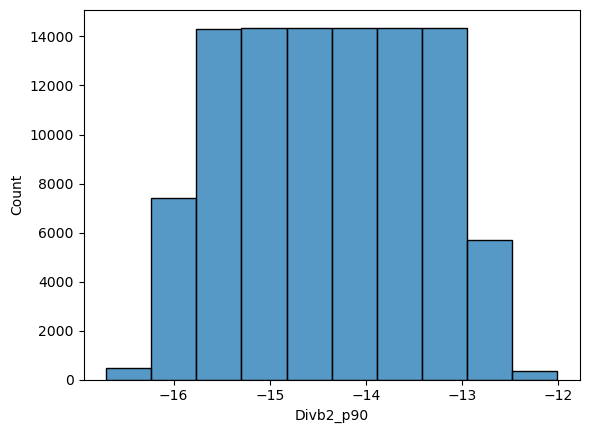

In [10]:
sns.histplot(train_tbl.Divb2_p90, bins=10)

# Check geography

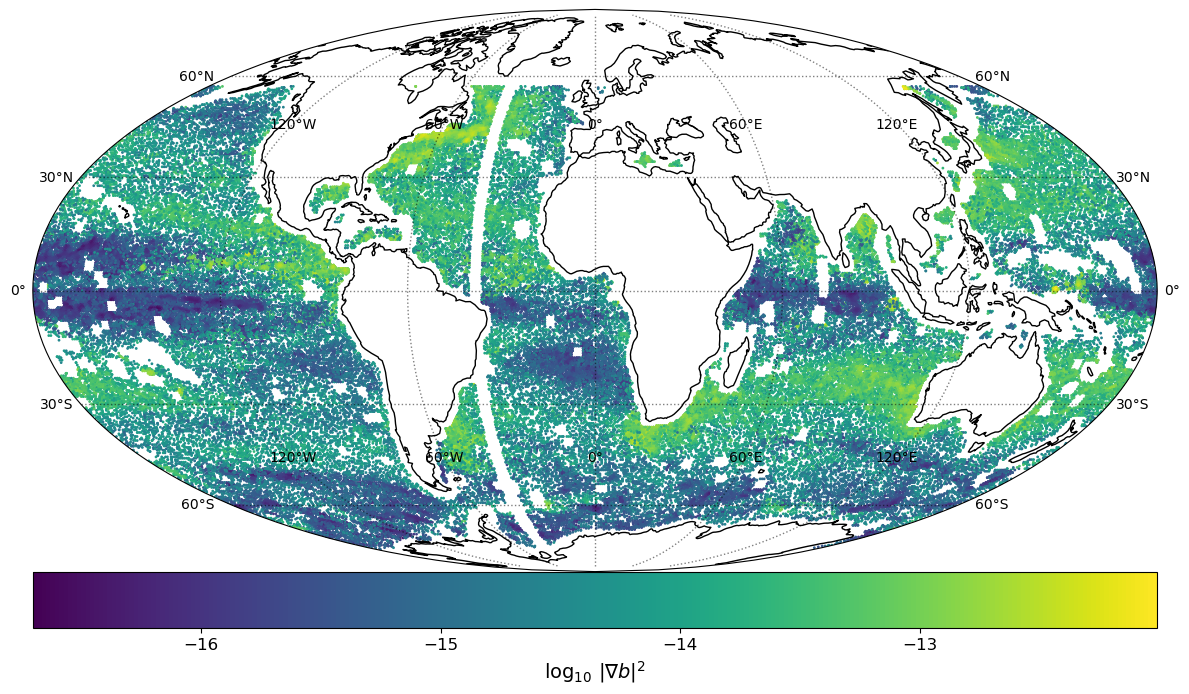

In [18]:
reload(plt_globe)
_ = plt_globe.plot_lons_lats_vals(train_tbl.lon, train_tbl.lat, 
                              train_tbl.Divb2_p90.values,
                                 cb_lbl=r'$\log_{10} \, |\nabla b|^2$')